In [ ]:
%matplotlib inline
import os
import glob
import numpy as np
from matplotlib import pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.merge import merge

In [ ]:
inputdir = "Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working//"
tiffiles = glob.glob(os.path.join(inputdir, "*.tif"))

How much to cut left and right, as a proportion. Larger proportion on side with fov extender shadow.

In [ ]:
lprop = 0.005
rprop = 0.20

In [ ]:
os.path.split(tiffiles[0])[1]

'VNIR_01_noscale6N.tif'

In [ ]:
def normalize_array(arr):
    array_min, array_max = arr.min(), 0.1*arr.max()
    return (arr - array_min)/(array_max - array_min)

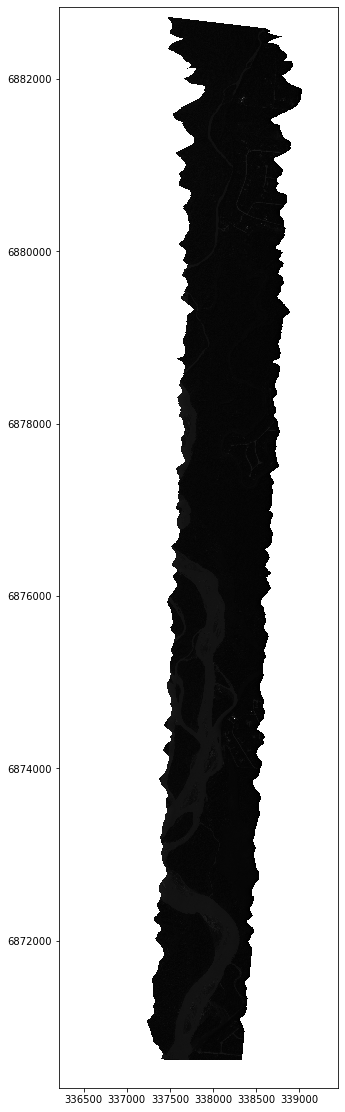

In [ ]:
firsttiff = tiffiles[0]
firstraster = rio.open(firsttiff)
plt.figure(figsize=(5, 30))
show(firstraster)

In [ ]:
firstraster.indexes

(1, 2, 3)

In [ ]:
band1 = firstraster.read(1)
band1[firstraster.height//2, firstraster.width//2]

0.010015576

In [ ]:
def getnonzerobounds(row):
    cond = row > 0.0
    return np.nonzero(cond)[0][0], np.nonzero(cond)[0][-1]

def croprow(row, lprop=0.05, rprop=0.05):
    try:
        lidx, ridx = getnonzerobounds(row)
        lidx = lidx + int((ridx - lidx) * lprop)
        ridx = ridx - int((ridx - lidx) * rprop)
        row[:lidx] = 0.0
        row[ridx:] = 0.0
    except IndexError:
        pass
    return row

In [ ]:
newraster = np.apply_along_axis(croprow, 1, band1)

In [ ]:
newraster.shape

(12542, 3237)

In [ ]:
band1.shape

(12542, 3237)

In [ ]:
newraster.mean()

0.0041379137

In [ ]:
band1.mean()

0.0045757606

In [ ]:
band1 = firstraster.read(1)

In [ ]:
getnonzerobounds(band1[500, :])

(1274, 2570)

In [ ]:
getnonzerobounds(newraster[500, :])

(1338, 2508)

Testprocessing one raster:

In [ ]:
profile = firstraster.profile
with rio.open(os.path.join(inputdir, "VNIR_01_clip.tif"), 'w', **profile) as dst:
    for ii in firstraster.indexes:
        layer = firstraster.read(ii)
        newraster = np.apply_along_axis(croprow, 1, layer, lprop=lprop, rprop=rprop)
        dst.write_band(ii, newraster)

Looping through all rasters:

In [ ]:
for fp in tiffiles:
    fn = os.path.split(fp)[1]
    with rio.open(fp) as rioraster:
        print(f"Opening {fp} for reading")
        profile = rioraster.profile
        outfn = "Clip_"+fn
        with rio.open(os.path.join(inputdir, outfn), 'w', **profile) as dst:
            print(f"Opening {outfn} for writing")
            for ii in rioraster.indexes:
                print(f"Writing layer {ii}")
                layer = rioraster.read(ii)
                newraster = np.apply_along_axis(croprow, 1, layer, lprop=lprop, rprop=rprop)
                dst.write_band(ii, newraster)
        lprop, rprop = rprop, lprop
        print(f"Done with {fp}")


Opening Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working\VNIR_01_noscale6N.tif for reading
Opening Clip_VNIR_01_noscale6N.tif for writing
Writing layer 1
Writing layer 2
Writing layer 3
Done with Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working\VNIR_01_noscale6N.tif
Opening Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working\VNIR_02_noscale6N.tif for reading
Opening Clip_VNIR_02_noscale6N.tif for writing
Writing layer 1
Writing layer 2
Writing layer 3
Done with Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working\VNIR_02_noscale6N.tif
Opening Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working\VNIR_03_noscale6N.tif for reading
Opening Clip_VNIR_03_noscale6N.tif for writing
Writing layer 1
Writing layer 2
Writing layer 3
Done with Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working\VNIR_03_noscale6N.tif
Opening Z://fihyper//cwaigl//20200714_MKB//02_intermediate//working\VNIR_04_noscale6N.tif for reading
Opening Clip_VNIR_04_noscale6N.